# Entanglement

**Superdense coding** and **Teleportation** are two quantum protocols, that are making use of entanglement to send and receive classical and quantum information, respectively. It is worth reviewing or discovering this phenomenon unique to quantum mechanics!

## Presentation
Entanglement arises in multiqubit systems.

Two qubits are said to be entangled if their combined state cannot be written as the tensor product of two one-qubit states.

__Example__:

1. $|\phi\rangle = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle\right) = \left( \frac{1}{\sqrt{2}} \left(0\rangle+ |1\rangle\right) \right)\otimes \left(\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\right)$

2. $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle +|11\rangle \right)$

State $|\phi\rangle$ is separable as it can be rewritten as the tensor product of the individual qubits' state.

In opposition, state $|\Phi^{+}\rangle$ is an entangled state as it cannot be rewritten as a tensor product of the individual qubits' states.<br>
One must think of these two qubits as one singular system of its own!<br>

Actually, $|\Phi^{+}\rangle$ is one of the 4 maximally entangled 2-qubit states called the Bell states.

## Bell states
The Bell states are 2-qubit quantum states that are the simplest examples of entangled states.
The four Bell states are:
- $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle +|11\rangle \right)$
- $|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle -|11\rangle \right)$
- $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}\left( |01\rangle +|10\rangle \right)$
- $|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}\left( |01\rangle -|10\rangle \right)$

Notice how the measurement of one qubit is correlated to the measurement of the second qubit in all the states present in the superpositions of each Bell states.

In an entangled state, the information between qubits is shared in a way that the measurement results of individual qubits are correlated.

We can generate the Bell states using a Hadamard gate, a CNOT gate, and some more one-qubit gates.<br>

Run the example below to generate $|\Phi^{+}\rangle$

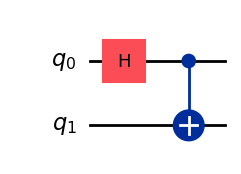

In [38]:
# Generate the "Phi +" Bell state
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.draw("mpl")

In [39]:
sv = Statevector(qc)
str = sv.draw('latex')
print("The statevector at the end of the circuit is:")
sv.draw('latex')

# If the Bell states are new to you, you should try
# to generate the 3 other Bell states as an exercise!

The statevector at the end of the circuit is:


<IPython.core.display.Latex object>

# Superdense coding

## Presentation

Superdense coding is a quantum communication protocol that enables two people to exchange bits of classical information using a fewer number of qubits, granted the two parties shared a pair of entangled qubits beforehand.

In a sense, superdense coding can be thought as the opposite of quantum teleportation, but we will touch on that in due time!

## Protocol
Let's say that Alice and Bob are the two parties who want to exchange a message using superdense coding. To do so, they will have to go through these steps:

### 1. Preparation of the entangled pair of qubits
First, they have to generate a pair of entangled qubits, say the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B)$.

### 2. Sharing the entangled qubits
Alice and Bob, each take one entangled qubit, and travel to a different location.

### 3. Alice encodes a message made of classical bits
Alice can encode a message using two classical bits.<br>
In other words, she can encode 4 messages: "00", "01", "10" and "11".

She needs to apply a different set of quantum gates on her entangled qubit depending on which message she wants to send to Bob:
- If she wants to send "00", she applies the identity operation
- If she wants to send "01", she needs to apply the X gate to her qubit
- If she wants to send "10", she needs to apply the Z gate to her qubit
- If she wants to send "11", she needs to apply the X gate, then the Z gate to her qubit

**Note**: In fact, Alice is applying gates to her entangled qubit to change the whole entangled system (i.e. the system composed of her qubit and Bob's!) into one of the 4 Bell states.

### 4. Alice sends her entangled qubit to Bob
Just like the title says, one qubit is transmitted to Bob.

### 5. Bob decodes Alice's message
In order to decode Alice's message (i.e. recover the classical bits), he needs to apply a CNOT gate on his qubit using Alice's qubit as control, then he needs to apply a Hadamard gate on his qubit.

**Note**: Bob is actually taking a Bell measurement: he uses a circuit that maps the Bell pairs to the 4 basis states of a 2-qubit system, namely $|00\rangle, |01\rangle, |10\rangle$ and $|11\rangle$.

Finally, Bob measures his qubit then Alice's qubit (i.e. he measures the 2-qubit state $|q_A q_B\rangle$) and decodes the message.

## Challenge
We ask you to:
- Implement the superdense coding protocol described above

- Show that your able to send and decode messages correctly

- (Bonus) Implement superdense coding on a real quantum computer

In [40]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [41]:
# Now, it's up to you!

def prepare_entangled_qubits() -> QuantumCircuit:
    """ Creates an entangled pair of qubits.
    q0 = Bob's qubit
    q1 = Alice's qubit
    """
    
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(control_qubit=0, target_qubit=1)

    return qc

def alice_encodes_her_qubit(message: str) -> QuantumCircuit:
    """"
    Alice receives her qubit and encodes her message.
    - If the message is "00", she applies identity
    - If the message is "01", she applies X
    - If the message is "10", she applies Z
    - If the message is "11", she applies X, then Z
    """

    
    qc = QuantumCircuit(1)
    
    if message == "10" :
        qc.x(0)
    elif message == "01" :
        qc.z(0)
    elif message == "11" :
        qc.x(0)
        qc.z(0)
    
    return qc

def bob_decodes_the_message() -> QuantumCircuit:
    """
    Bob received his qubit, and travelled somewhere remote.
    Eventually, he receives Alice's qubit and decodes her message.
    q0 = Bob's qubit
    q1 = Alice's qubit
    """
    
    qc = QuantumCircuit(2, 2) # the first parameter is the size of the quantum register, the second is the size of the classical register
    # TODO: Add what Bob has to do to decode Alice's message
    #...

    qc.cx(control_qubit=0, target_qubit=1)
    qc.h(0)
    qc.barrier()
    qc.measure([0, 1], [0, 1]) # maps the measurement results of q0 and q1 on classical bit b0 and b1, respectively

    return qc

def create_superdense_circuit(message: str) -> QuantumCircuit:
    """ 
    Assembles the superdense coding circuit.
    q0 = Bob's qubit
    q1 = Alice's qubit
    """
    alice_qubit = QuantumRegister(1, 'Alice')
    bob_qubit = QuantumRegister(1, 'Bob')
    alice_bit = ClassicalRegister(1, 'Alice_msrnt')
    bob_bit = ClassicalRegister(1, 'Bob_msrnt')

    qc = QuantumCircuit(bob_qubit, alice_qubit, bob_bit, alice_bit)
    
    # Use the QuantumCircuit function .append(circuit.to_instruction(), [list of qubit indices where to append circuit], [list of classical bits indices])
    # TODO

    qc.append(qc.to_instruction(),[0,1],[0,1])

    # Prepare a pair of entangled qubits 

    qc.append(prepare_entangled_qubits().to_instruction(),[0,1])
    
    qc.barrier()
    
    # Alice receives her entangled qubit and encodes a message
    #...

    qc.append(alice_encodes_her_qubit(message).to_instruction(),[1])
    
    qc.barrier()

    # Alice sends her encoded qubit to Bob who received his entangled qubit.
    # He proceeds to decode Alice's message
    #...
    qc.append(bob_decodes_the_message().to_instruction(),[0,1],[0,1])

    return qc

In [42]:
print("00")
qc = create_superdense_circuit("00")
# You can check the configuration of the circuit you built
qc.decompose().draw()


00


┌───┐      ░  ░      ┌───┐ ░ ┌─┐   
          Bob: ┤ H ├──■───░──░───■──┤ H ├─░─┤M├───
               └───┘┌─┴─┐ ░  ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
        Alice: ─────┤ X ├─░──░─┤ X ├──────░──╫─┤M├
                    └───┘ ░  ░ └───┘      ░  ║ └╥┘
  Bob_msrnt: 1/══════════════════════════════╩══╬═
                                             0  ║ 
Alice_msrnt: 1/═════════════════════════════════╩═
                                                0

In [43]:
print("01")
qc = create_superdense_circuit("01")
# You can check the configuration of the circuit you built
qc.decompose().draw()



01


┌───┐      ░       ░      ┌───┐ ░ ┌─┐   
          Bob: ┤ H ├──■───░───────░───■──┤ H ├─░─┤M├───
               └───┘┌─┴─┐ ░ ┌───┐ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
        Alice: ─────┤ X ├─░─┤ Z ├─░─┤ X ├──────░──╫─┤M├
                    └───┘ ░ └───┘ ░ └───┘      ░  ║ └╥┘
  Bob_msrnt: 1/═══════════════════════════════════╩══╬═
                                                  0  ║ 
Alice_msrnt: 1/══════════════════════════════════════╩═
                                                     0

In [44]:
print("10")
qc = create_superdense_circuit("10")
# You can check the configuration of the circuit you built
qc.decompose().draw()



10


┌───┐      ░       ░      ┌───┐ ░ ┌─┐   
          Bob: ┤ H ├──■───░───────░───■──┤ H ├─░─┤M├───
               └───┘┌─┴─┐ ░ ┌───┐ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
        Alice: ─────┤ X ├─░─┤ X ├─░─┤ X ├──────░──╫─┤M├
                    └───┘ ░ └───┘ ░ └───┘      ░  ║ └╥┘
  Bob_msrnt: 1/═══════════════════════════════════╩══╬═
                                                  0  ║ 
Alice_msrnt: 1/══════════════════════════════════════╩═
                                                     0

In [45]:
print("11")
qc = create_superdense_circuit("11")
# You can check the configuration of the circuit you built
qc.decompose().draw()

11


┌───┐      ░            ░      ┌───┐ ░ ┌─┐   
          Bob: ┤ H ├──■───░────────────░───■──┤ H ├─░─┤M├───
               └───┘┌─┴─┐ ░ ┌───┐┌───┐ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
        Alice: ─────┤ X ├─░─┤ X ├┤ Z ├─░─┤ X ├──────░──╫─┤M├
                    └───┘ ░ └───┘└───┘ ░ └───┘      ░  ║ └╥┘
  Bob_msrnt: 1/════════════════════════════════════════╩══╬═
                                                       0  ║ 
Alice_msrnt: 1/═══════════════════════════════════════════╩═
                                                          0

In [46]:
def check_superdense_protocol(protocol: QuantumCircuit, simulator: BasicSimulator) -> dict[str, str]:
    """ 
    Runs the superdense coding protocol for all possible messages, and check if the messages are decoded correctly
    """
    messages = {"00":None, "01": None, "10": None, "11": None}

    for message in messages.keys():
        qc = transpile(protocol(message), simulator)
        result = simulator.run(qc).result()
        counts = result.get_counts()
        messages[message] = max(counts, key=counts.get)
    
    return messages     


In [47]:
simulator = BasicSimulator()

messages = check_superdense_protocol(create_superdense_circuit, simulator)

# Verify the protocol works
for k, v in messages.items():
    print("Message was {0}. Decoded message is {1}".format(k,v))

Message was 00. Decoded message is 0 0
Message was 01. Decoded message is 0 1
Message was 10. Decoded message is 1 0
Message was 11. Decoded message is 1 1


### Evaluation
- Show that you are able to decode all the messages by showing a mentor the output of the previous cell

- Show a mentor the circuit using "qc.decompose().draw()" for all messages

## Superdense coding on a real quantum computer

### Retrieve your IBM token
You should already have created a Pinq2 and IBM account using the same email address.

1. Go to [Pinq2 website](https://www.pinq2.com/)

2. Enter your account credentials

3. Click on "Plateform Quantum Computing", this will redirect you to the "IBM Quantum Platform" dashboard where you can monitor the jobs you will send for execution on real quantum hardware.

4. Your API token will be on the top right corner, copy it and use it in the following coding cell

In [48]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler import generate_preset_pass_manager
 
 # Get your IBM token and write it here
token = "<IBM_TOKEN>"
instance = 'INSTANCE_PATH'

# Instanciate a session for using IBM quantum hardware
service = QiskitRuntimeService(channel="ibm_quantum", instance=instance, token=token)

InvalidAccountError: 'Invalid `instance` value. Expected hub/group/project format, got INSTANCE_PATH'

In [ ]:
"""" 
Use IBM quantum computer
"""

# Check for the least busy backend (i.e. quantum processor) and select it
backend = service.least_busy(operational=True, simulator=False)
print("Running experiment on backend: {}".format(backend.name))

# Instanciate the circuit to be run on the quantum computer
# and its various parameters, as well as experiment parameters
#TODO: Try different messages and #shots
shots = 500 # Add the number of times you want to run the experiment to gather statistics
message = "10" 
sampler = Sampler(backend)
qc = create_superdense_circuit(message)

# The native quantum gates implemented on a quantum processor may vary between different backends.
# The preset manager is a tool that transpiles the circuit, that is, it will convert the circuit into instructions
# that can run on the specified quantum computer, given its native quantum gate set.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1) # You can try different optimization_level!
isa_circuit = pm.run(qc)

# Send the circuit to implement on the quantum computer
# It might take a while for the job to complete (several minutes to hours if the traffic is heavy)
# You can go to the job dashboard on a browser to check the status of your job.
job = sampler.run([isa_circuit], shots=shots).result()

In [ ]:
""" Post-processing of the results """

# Extract the measurement results of Bob's qubit and Alice's
# and plot the count statistics, just like we did with the simulator!
pub_result = job[0]
joint_counts = pub_result.join_data().get_counts()
plot_histogram(joint_counts)


In [ ]:
print("The message was '{0}' and the decoded message is '{1}'.".format(message, max(joint_counts, key=joint_counts.get)))

In [ ]:
""" Analysis 
Try the superdense coding protocol for every possible message using a real quantum computer.
How do your results on the quantum computer compare to the ones you found using the simulator in this notebook?
"""

In [ ]:
# If you want to take a look at what the transpiled teleportation circuit
# looks like after transpilation on the backend you used, run this cell
# The output may be quite big depending on the number of qubits available on 
# the specific backend that used
isa_circuit.draw()

# Quantum teleportation

## Presentation
Quantum teleportation is a method that enables the transmission of quantum information from one location to another, by making use of a single classical information channel, granted a pair of two entangled qubits was shared beforehand between the transmitter and receiver.

## Protocol
Imagine that Alice and Bob are two quantum developpers.

Knowing that Bob will be away on the International Space Station for the next couple of months, Alice and Bob decides to share a few numbers of pairs of entangled qubits in case they need to communicate during Bob's space outing.

One day, Alice generates an interesting quantum state that she would like to share with Bob. She decides to use the following steps to teleport it on board of the ISS:

### 1. Alice performs a Bell measurement on her qubit and the qubit to teleport
A Bell measurement is a transformation that maps the 4 Bell states to the 2-qubit basis states, namely $|00\rangle, |01\rangle, |10\rangle$ and $|11\rangle$.

In terms of circuit instructions, Alice needs to apply a CNOT on the qubit she wants to teleport using her own qubit as control. Then, she needs to apply a Hadamard gate to the qubit to teleport.
<br>
(You have already seen a Bell measurement during the superdense coding protocol!).

Next, Alice performs a measurement on her own qubit and another one on the qubit she wants to teleport to Bob.

Finally, Alice sends both measurement results to Bob using a classical communication channel, say over the radio.

### 2. Bob recreates the quantum state on his qubit using Alice's measurement results
After reception of Alice's measurement results, Bob applies the following correction to his qubit.<br> If Alice's result is :
- $b_{A}b_{|\phi\rangle}=00$, Bob doesn't need to do anything
- $b_{A}b_{|\phi\rangle}=01$, Bob needs to apply the Z gate to his qubit
- $b_{A}b_{|\phi\rangle}=10$, Bob needs to apply the X gate to his qubit
- $b_{A}b_{|\phi\rangle}=11$, Bob needs to apply the X gate, followed by the Z gate, to his qubit

$b_{A}$: Alice's result after measuring her qubit<br>
$b_{|\phi\rangle}$: the result after measuring the qubit to teleport.


## Challenge
We ask you to:
- Implement the teleportation protocol described above

- Show that it works correctly

- (Bonus) Implement teleportation on a real quantum computer

In [53]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.circuit.library import UGate
from qiskit import transpile
from qiskit.result import marginal_distribution
import numpy.random as random

In [80]:
def create_state_phi(state: str, params: dict[str, float]) -> QuantumCircuit:
    """ We need to generate a quantum state to teleport.
    We will teleport 3 types of quantum states precised by "state":
    - "0": the quantum state |0>
    - "1": the quantum state |1>
    - "random": a random quantum state of the form |phi> = a|0> + b|1>
    - params: stores the angles "theta", "phi" and "lam" necesseray to build the random quantum state
    """
    qc = QuantumCircuit(1)

    if state == "0":
        pass

    elif state == "1":
        qc.x(0)
    
    elif state == "random":
        # Create a random quantum state by using the general quantum gate U from qiskit

        #TODO: create the random gate 
        #...
        qc.u(params["theta"],params["phi"],params["lambda"],0)

    return qc

def prepare_entangled_qubits() -> QuantumCircuit:
    """ Creates an entangled pair of qubits. 
    q0 = Alice's qubit
    q1 = Bob's qubit
    """
    
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0,1)

    return qc

def alice_performs_a_bell_measurement() -> QuantumCircuit:
    """
    Alice performs a Bell measurement on her qubit and the qubit to teleport.
    q0 = state |phi>
    q1 = Alice's qubit
    """
    qc = QuantumCircuit(2, 2)
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()
    qc.measure([0, 1], [0, 1])
    
    return qc

def bob_corrects_his_qubit() -> QuantumCircuit:
    """
    Bob corrects his qubit depending on the result of Alice's measurements.
    - If Alice qubit is in the state |1> after measurement, he needs to apply Z
    - If the qubit to teleport is in the state |1> after measurement, he needs to apply X
    q0 = qubit to teleport
    q1 = Alice
    q2 = Bob
    """
    qc = QuantumCircuit(3)
    
    qc.cx(1,2)
    qc.cz(0,2)

    return qc

def build_teleportation_circuit(state: str, params) -> QuantumCircuit:
    """" 
    Assembles all the quantum circuits to build the teleportation circuit.
    state = string precising which state to teleport "0", "1" or "random"
    q0 = qubit to teleport
    q1 = Alice
    q2 = Bob
    """
    tele_qubit = QuantumRegister(1, 'qubit X')
    alice_qubit = QuantumRegister(1, 'Alice')
    bob_qubit = QuantumRegister(1, 'Bob')
    alice_bit = ClassicalRegister(1, 'Alice_msrnt')
    tele_bit = ClassicalRegister(1, 'X_msrnt')
    bob_bit = ClassicalRegister(1, 'Bob_msrnt')

    qc = QuantumCircuit(tele_qubit, alice_qubit, bob_qubit, tele_bit, alice_bit, bob_bit)

    # Use the QuantumCircuit function .append(circuit.to_instruction(), [list of qubit indices where to append circuit], [list of classical bits indices])

    # Create the teleported state |phi>
    # TODO
    #...

    qc.append(create_state_phi(state,params),[0])

    qc.barrier()

    # Prepare the entangled qubits
    # TODO
    #...
    qc.append(prepare_entangled_qubits(),[1,2])
    qc.barrier()

    # Alice performs the bell measurements
    # TODO
    #...
    qc.append(alice_performs_a_bell_measurement(),[0,1],[0,1])
    qc.barrier()

    # Bob receives the information from Alice and performs the necessary corrections on his qubit
    # TODO
    #...
    qc.append(bob_corrects_his_qubit(),[0,1,2])
    qc.barrier()

    # Apply inverse of the teleported state to check if the protocol was successful!
    # If it is a success, you should read |0> after applying the inverse of the teleported qubit on Bob's qubit after he applied the corrections.
    # TODO
    #...

    qc.append(create_state_phi(state, params).inverse(), [2])

    # Measure Bob's qubit and store it's value in a classical bit
    qc.measure([2], [2])

    return qc


In [ ]:
# You can check the configuration of the circuit you built
state_to_teleport = "0"
params = {} # can be used to implement the "random" state
circuit = build_teleportation_circuit(state_to_teleport, params)
circuit.decompose().draw()


┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░          ░         
      qubit X: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■──░─────────
               └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░         
        Alice: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼──░─────────
                     ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ ┌───┐┌─┐
          Bob: ──────░──────┤ X ├─░───────────────╫──╫──░─┤ X ├─■──░─┤ X ├┤M├
                     ░      └───┘ ░               ║  ║  ░ └───┘    ░ └───┘└╥┘
    X_msrnt: 1/═══════════════════════════════════╩══╬═════════════════════╬═
                                                  0  ║                     ║ 
Alice_msrnt: 1/══════════════════════════════════════╩═════════════════════╬═
                                                     0                     ║ 
  Bob_msrnt: 1/════════════════════════════════════════════════════════════╩═
                                                                           0

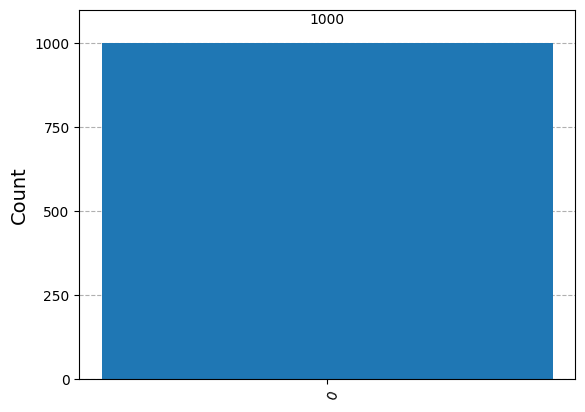

In [82]:
# Run the teleportation circuit
shots = 1000
simulator = AerSimulator()
state = "1"
params = {}
# # TODO: To build the random quantum state, you need to sample randomly the three parameters of the UGate, qiskit's most general gate.
state = "random"
angles=np.random.rand(3)*2*np.pi
random_params = {"theta": angles[0],
                 "phi": angles[1],
                 "lambda": angles[2]}

qc = build_teleportation_circuit(state, random_params)
# qc = build_teleportation_circuit(state, params)

qc = transpile(qc, simulator)

result = simulator.run(qc, shots=shots).result()

counts = result.get_counts()

# Count statistics, q2 should give the same result everytime "0" or "1" depending on which state was teleported
# Except when the random quantum state is teleported!
# plot_histogram(counts)

# Here we only look at the result qubit at the end of the teleportation circuit
# If it's 0, the teleportation was a success!
filtered_statistics = marginal_distribution(counts, [2])
display(plot_histogram(filtered_statistics))

### Evaluation
- Show a mentor the output histogram of the teleportation circuit when teleporting a "random" quantum state

- Show a mentor the circuit for the states "0", "1" and "random" using "qc.decompose().draw()"

## Teleportation on a real quantum computer

### Retrieve your IBM token (if not already done in the superdense coding section)
You should already have created a Pinq2 and IBM account using the same email address.

1. Go to [Pinq2 website](https://www.pinq2.com/)

2. Enter your account credentials

3. Click on "Plateform Quantum Computing", this will redirect you to the "IBM Quantum Platform" dashboard where you can monitor the jobs you will send for execution on real quantum hardware.

4. Your API token will be on the top right corner, copy it and use it in the following coding cell

In [ ]:
""" If you have already instanciated a service instance by giving your IBM token during the superdense coding section:
        pass
Else:
    uncomment and run this cell
"""

# from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
# from qiskit.transpiler import generate_preset_pass_manager
# # Get your IBM token and write it here
# token = "<YOUR_IBM_TOKEN>"
# instance = '<THE_CORRECT_INSTANCE_PATH>'

# # Instanciate a session for using IBM quantum hardware
# service = QiskitRuntimeService(channel="ibm_quantum", instance=instance, token=token)

In [ ]:
"""" 
Use IBM quantum computer
"""
# Check for the least busy backend (i.e. quantum processor) and select it
backend = service.least_busy(operational=True, simulator=False)
print("Running experiment on backend: {}".format(backend.name))

# Instanciate the circuit to be run on the quantum computer
# and its various parameters, as well as experiment parameters
shots = 500 # Add the number of times you want to run the experiment to gather statistics
qstate_to_teleport = "random"
random_params = {None} #TODO: teleport the random state!

sampler = Sampler(backend)

qc = build_teleportation_circuit(qstate_to_teleport, params) # Choose a startin

# The native quantum gates implemented on a quantum processor may vary between different backends.
# The preset manager is a tool that transpiles the circuit, that is, it will convert the circuit into instructions
# that can run on the specified quantum computer, given its native quantum gate set.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1) # You can try different optimization_level!
isa_circuit = pm.run(qc)

# Send the circuit to implement on the quantum computer
# It might take a while for the job to complete (several minutes to hours if the traffic is heavy)
# You can go to the job dashboard on a browser to check the status of your job.
job = sampler.run([isa_circuit], shots=shots).result()

In [ ]:
""" Post-processing of the results """

# Extract the measurement results of Bob's qubit
# and plot the count statistics, just like we did with the simulator!
pub_result = job[0]
joint_counts = pub_result.join_data().get_counts()
filtered_statistics = marginal_distribution(joint_counts, [2])
display(plot_histogram(filtered_statistics))

In [ ]:
""" Analysis
How do your results on the quantum computer compare to the ones you found using the simulator in this notebook?
Try the same experiment for different states.
"""

In [ ]:
# If you want to take a look at what the transpiled teleportation circuit
# looks like after transpilation on the backend you used, run this cell
# The output may be quite big depending on the number of qubits available on 
# the specific backend that used
isa_circuit.draw()